## Outlier

- An outlier is an observation of a data point that lies an abnormal distance from other values in a given population.
- An outlier is an object(s) that deviates(विचलित होते) significantly from the rest of the object collection.
- It is abnormal observation during the Data Analysis Stage, that data point lies far away from the other values.

## Handling Outlier :-
- Outliers can either be a mistake or just variance.
- If we found this is due to mistake,then we can ignore them.
- If we found this due to variance, in the data, we can work on this.

## Possibilities for an Outlier
- Incorrect data entry or error during data processing.
- Missing values in a dataset.
- Data did not come from the intended(हेतू) Sample.
- Errors occur during the experiments(biological Data Sets).
- Not an errored,it would be unusual from the original.
- Extreme distribution than normal.

### Solution for outlier
- Go back to person those collect that data

### Effects on EDA
- Affects numerical measures(if it's extreme daat then it affects on mean values).
- Affects correlation.

### Drop outliers or not
- Before dropping the outliers,we must analyze the dataset with and without outliers and understand the better impact of the results.
- If you observed that it is obvious due to incoorectly entered,certainly you can drop the outlier.No issues on that case.
- If you find that your assumptions are getting affected,you may drop the outlier straight away,provided that no changes in the results.
- If the outlier affects your assumptions and results.No questions simply drop the outlier and proceed with your further steps.

### Finding outliers

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df_diabetes = pd.read_csv('E:\JupyterDemo\diabetes.csv')

In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


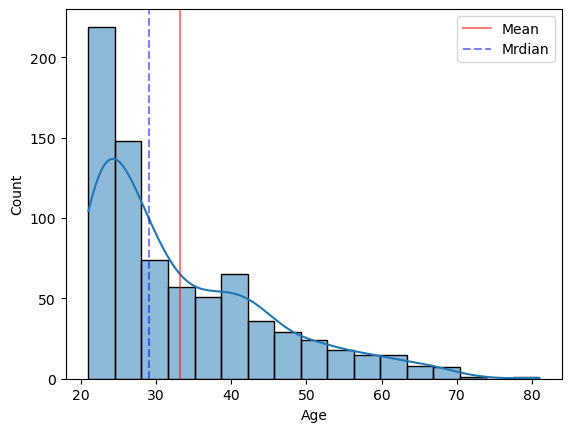

In [5]:
# Draw Histogram

sns.histplot(data=df_diabetes['Age'],kde=True)
plt.axvline(x=df_diabetes.Age.mean(),color = 'red',alpha = 0.5,label ='Mean')
plt.axvline(x=df_diabetes.Age.median(),color='blue',ls='--',alpha =0.5,label = 'Mrdian')
plt.legend()

- #### For above histrogram suggest that our mean is higher than median and data in right skewed

<Axes: ylabel='Age'>

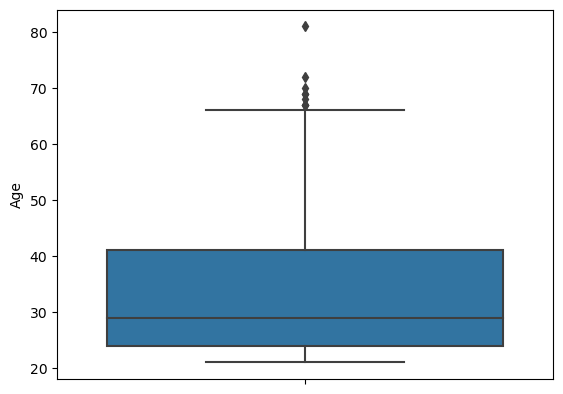

In [7]:
#Box Plot

sns.boxplot(y=df_diabetes['Age'])

### Approaches can be used
- Outlier replacements using computed mean.
- Outlier replacements using computed median.
- Outlier replacements using group mean,if classification approch.
- Outlier replacements using group median,if classification approch.
- Outlier removal or filling of missing values(Z Score and/or IQR)

#### Z Score
- Basically calculating standard normal distribution.
- Describe any data point by finding their relationship between mean and standard deviation of the group of data point.
- It find the distribution of data where mean is 0 and standard deviation is 1.
- If Z-score value is greater thaan or less than 3 or -3 respectively,that data point will be identified by as outlier.

In [10]:
z = np.abs(stats.zscore(df_diabetes['Age']))
print(z)

0      1.425995
1      0.190672
2      0.105584
3      1.041549
4      0.020496
         ...   
763    2.532136
764    0.531023
765    0.275760
766    1.170732
767    0.871374
Name: Age, Length: 768, dtype: float64


In [15]:
threshold = 3
print(np.where(z > 3))

(array([123, 453, 459, 666, 684], dtype=int64),)


In [17]:
threshold = -3
print(np.where(z < -3))

(array([], dtype=int64),)


### IQR(Inner Quartile Range)
- Data has divided into quartiles(Q1,Q2 and Q3)
    - 25th percentile of the data-Q1
    - 50th percentile of the data-Q2
    - 75th percentile of the data-Q3
    - Lower limit for outlier Q1-1.5*IQR
    - Upper limit for outlier Q3+1.5*IQR
    - IQR = Q3-Q1

In [25]:
Q1 = np.percentile(df_diabetes['Age'],25,interpolation= 'midpoint')
Q2 = np.percentile(df_diabetes['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(df_diabetes['Age'],75,interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

24.0
29.0
41.0


C:\Users\Sairam\AppData\Local\Temp\ipykernel_468\1337219579.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_diabetes['Age'],25,interpolation= 'midpoint')
C:\Users\Sairam\AppData\Local\Temp\ipykernel_468\1337219579.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df_diabetes['Age'],50,interpolation = 'midpoint')
C:\Users\Sairam\AppData\Local\Temp\ipykernel_468\1337219579.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lo

In [29]:
IQR = Q3-Q1
print('Interquartile range',IQR)

low_limit = Q1-(1.5*IQR)
upp_limit = Q3+(1.5*IQR)

print('Lower Limit is ',low_limit)
print('Upper Limit is ',upp_limit)

outlier = []
for x in df_diabetes['Age']:
    if((x > upp_limit) or (x < low_limit)):
        outlier.append(x)
print('outlier in the dataset is',outlier)

Interquartile range 17.0
Lower Limit is  -1.5
Upper Limit is  66.5
outlier in the dataset is [69, 67, 72, 81, 67, 67, 70, 68, 69]
